In [0]:
from google.colab import drive
import os
!pip install bayesian-optimization
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/house-prices-advanced-regression-techniques/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
df_train = pd.read_csv("train.csv")
df_test =  pd.read_csv("test.csv")
print("Train shape : ",df_train.shape)
print("Test shape : ",df_test.shape)

Train shape :  (1460, 81)
Test shape :  (1459, 80)


In [0]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Exploratory Analysis
Find percentage of NaN values



# Handle missing Value into multiple columns


In [0]:
def check_for_missing(df_train):
  percent_missing = df_train.isnull().sum() * 100 / len(df_train)
  missing_value_df = pd.DataFrame({'column_name': df_train.columns,'percent_missing': percent_missing})
  missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
  with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(missing_value_df[missing_value_df['percent_missing'] >0 ])
  return missing_value_df

Drop columns that have more than 80 percentage of NaN values.

In [0]:
missing_value_df_train=check_for_missing(df_train)
print("----------------------------------------------------")
missing_value_df_test=check_for_missing(df_test)

               column_name  percent_missing
PoolQC              PoolQC        99.520548
MiscFeature    MiscFeature        96.301370
Alley                Alley        93.767123
Fence                Fence        80.753425
FireplaceQu    FireplaceQu        47.260274
LotFrontage    LotFrontage        17.739726
GarageYrBlt    GarageYrBlt         5.547945
GarageCond      GarageCond         5.547945
GarageType      GarageType         5.547945
GarageFinish  GarageFinish         5.547945
GarageQual      GarageQual         5.547945
BsmtFinType2  BsmtFinType2         2.602740
BsmtExposure  BsmtExposure         2.602740
BsmtQual          BsmtQual         2.534247
BsmtCond          BsmtCond         2.534247
BsmtFinType1  BsmtFinType1         2.534247
MasVnrArea      MasVnrArea         0.547945
MasVnrType      MasVnrType         0.547945
Electrical      Electrical         0.068493
----------------------------------------------------
               column_name  percent_missing
PoolQC              Poo

In [0]:
def replace_nan(data,NanColumns):
  for column in NanColumns:
    print(column,"----",data[column].dtype)
    value=0
    if 'float' not in str(data[column].dtype):
      value=data[column].mode()[0]
    else:
      value=data[column].mean()
    #print("Replacing ",column,"NaN values with value ",value)
    data[column].fillna(value, inplace = True)
  return data
drop_columns=['PoolQC','MiscFeature','Alley','Fence']


In [0]:
NanColumns=list(missing_value_df_train.loc[missing_value_df_train['percent_missing'] >0 ]['column_name'])
NanColumns = list(set(NanColumns)^set(drop_columns))
NanColumns.remove("FireplaceQu")
train=df_train.drop(drop_columns,axis=1)
train.drop(["Id"],axis=1,inplace=True)
train["FireplaceQu"].fillna("NotAvailable", inplace = True)
train=replace_nan(train,NanColumns)

LotFrontage ---- float64
Electrical ---- object
GarageCond ---- object
GarageFinish ---- object
BsmtFinType2 ---- object
GarageQual ---- object
MasVnrArea ---- float64
BsmtQual ---- object
BsmtCond ---- object
GarageYrBlt ---- float64
MasVnrType ---- object
GarageType ---- object
BsmtFinType1 ---- object
BsmtExposure ---- object


In [0]:
NanColumns=list(missing_value_df_test.loc[missing_value_df_test['percent_missing'] >0 ]['column_name'])
NanColumns = list(set(NanColumns)^set(drop_columns))
NanColumns.remove("FireplaceQu")
test=df_test.drop(drop_columns,axis=1)
test.drop(["Id"],axis=1,inplace=True)
test["FireplaceQu"].fillna("NotAvailable", inplace = True)
test=replace_nan(test,NanColumns)

LotFrontage ---- float64
Functional ---- object
BsmtFinSF2 ---- float64
GarageQual ---- object
SaleType ---- object
MSZoning ---- object
BsmtUnfSF ---- float64
BsmtFinSF1 ---- float64
KitchenQual ---- object
BsmtHalfBath ---- float64
MasVnrArea ---- float64
MasVnrType ---- object
GarageArea ---- float64
GarageType ---- object
Utilities ---- object
BsmtExposure ---- object
GarageCars ---- float64
Exterior2nd ---- object
GarageCond ---- object
GarageFinish ---- object
BsmtFinType2 ---- object
Exterior1st ---- object
BsmtQual ---- object
BsmtCond ---- object
TotalBsmtSF ---- float64
GarageYrBlt ---- float64
BsmtFinType1 ---- object
BsmtFullBath ---- float64


In [0]:
check_for_missing(train)

Empty DataFrame
Columns: [column_name, percent_missing]
Index: []


,column_name,percent_missing
MSSubClass,MSSubClass,0.0
HalfBath,HalfBath,0.0
FireplaceQu,FireplaceQu,0.0
Fireplaces,Fireplaces,0.0
Functional,Functional,0.0
...,...,...
MasVnrArea,MasVnrArea,0.0
MasVnrType,MasVnrType,0.0
Exterior2nd,Exterior2nd,0.0
Exterior1st,Exterior1st,0.0


In [0]:
check_for_missing(test)

Empty DataFrame
Columns: [column_name, percent_missing]
Index: []


,column_name,percent_missing
MSSubClass,MSSubClass,0.0
GarageType,GarageType,0.0
Fireplaces,Fireplaces,0.0
Functional,Functional,0.0
TotRmsAbvGrd,TotRmsAbvGrd,0.0
...,...,...
MasVnrArea,MasVnrArea,0.0
MasVnrType,MasVnrType,0.0
Exterior2nd,Exterior2nd,0.0
Exterior1st,Exterior1st,0.0


In [0]:
check_for_missing(test)

Empty DataFrame
Columns: [column_name, percent_missing]
Index: []


,column_name,percent_missing
MSSubClass,MSSubClass,0.0
GarageType,GarageType,0.0
Fireplaces,Fireplaces,0.0
Functional,Functional,0.0
TotRmsAbvGrd,TotRmsAbvGrd,0.0
...,...,...
MasVnrArea,MasVnrArea,0.0
MasVnrType,MasVnrType,0.0
Exterior2nd,Exterior2nd,0.0
Exterior1st,Exterior1st,0.0


# Plot Correllation Matrix


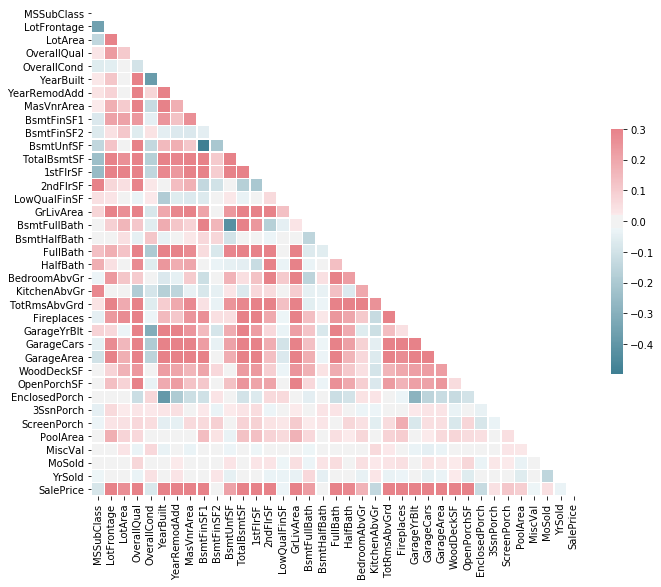

In [0]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Transform categorical data to numerical

In [0]:
categories={}
categories_inv={}
for column in train.columns:
  if 'object' in str(train[column].dtypes):
    vals=set(list(train[column]))
    categories[column]={elem:ind for ind,elem in enumerate(vals)}
    categories_inv[column]={ind:elem for ind,elem in enumerate(vals)}

In [0]:
for col in train.columns:
  if col in categories.keys():
    train.replace({col: categories[col]},inplace=True)

for col in test.columns:
  if col in categories.keys():
    test.replace({col: categories[col]},inplace=True)

In [0]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,0,1,1,1,4,0,17,0,0,3,4,7,5,2003,2003,2,0,9,11,2,196.0,3,0,4,3,3,2,0,706,4,0,150,856,3,3,1,3,856,854,0,1710,1,0,2,1,3,1,3,8,3,0,2,0,2003.0,0,2,548,0,0,2,0,61,0,0,0,0,0,2,2008,3,3,208500
1,20,3,80.0,9600,0,1,1,1,1,0,2,2,0,3,7,6,8,1976,1976,2,0,12,14,3,0.0,0,0,0,3,3,3,1,978,4,0,284,1262,3,3,1,3,1262,0,0,1262,0,1,2,0,3,1,0,6,3,1,0,0,1976.0,0,2,460,0,0,2,298,0,0,0,0,0,0,5,2007,3,3,181500
2,60,3,68.0,11250,0,0,1,1,4,0,17,0,0,3,4,7,5,2001,2002,2,0,9,11,2,162.0,3,0,4,3,3,0,0,486,4,0,434,920,3,3,1,3,920,866,0,1786,1,0,2,1,3,1,3,6,3,1,0,0,2001.0,0,2,608,0,0,2,0,42,0,0,0,0,0,9,2008,3,3,223500
3,70,3,60.0,9550,0,0,1,1,3,0,0,0,0,3,4,7,5,1915,1970,2,0,6,0,3,0.0,0,0,3,0,0,2,1,216,4,0,540,756,3,1,1,3,961,756,0,1717,1,0,1,0,3,1,3,7,3,1,1,2,1998.0,2,3,642,0,0,2,0,35,272,0,0,0,0,2,2006,3,2,140000
4,60,3,84.0,14260,0,0,1,1,1,0,9,0,0,3,4,8,5,2000,2000,2,0,9,11,2,350.0,3,0,4,3,3,1,0,655,4,0,490,1145,3,3,1,3,1145,1053,0,2198,1,0,2,1,4,1,3,9,3,1,0,0,2000.0,0,3,836,0,0,2,192,84,0,0,0,0,0,12,2008,3,3,250000


# Feature importance / Feature Selection


In [0]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

def Kbest(X,Y):
  bestfeatures=SelectKBest(score_func=chi2, k=X.shape[1])
  fit = bestfeatures.fit(X,Y)
  return (X.columns,fit.scores_)

def RandomForest(X,Y):
  clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
  clf.fit(X, Y)
  return(X.columns, clf.feature_importances_)

def select_best_features(X,Y,func):
  pd.set_option('display.max_rows', None)
  pd.set_option('display.max_columns', None)
  pd.set_option('display.width', None)
  pd.set_option('display.max_colwidth', -1)
  (features,scores) = func(X,Y)
  dfscores = pd.DataFrame([float('%.4f'%x) for x in scores])
  dfcolumns = pd.DataFrame(features)
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  featureScores.columns = ['Specs','Score']
  L=featureScores.nlargest(X.shape[1],'Score')
  print(L)
  return L
chi_features=select_best_features(train.loc[:, train.columns != 'SalePrice'],train['SalePrice'],Kbest)
rf_features=select_best_features(train.loc[:, train.columns != 'SalePrice'],train['SalePrice'],RandomForest)


            Specs         Score
3   LotArea        1.011497e+07
70  MiscVal        6.253332e+06
42  2ndFlrSF       4.648841e+05
32  BsmtFinSF1     3.999851e+05
69  PoolArea       3.835642e+05
34  BsmtFinSF2     3.688827e+05
24  MasVnrArea     2.857403e+05
35  BsmtUnfSF      2.747512e+05
43  LowQualFinSF   2.448810e+05
44  GrLivArea      1.968501e+05
36  TotalBsmtSF    1.747065e+05
67  3SsnPorch      1.549360e+05
68  ScreenPorch    1.366295e+05
64  WoodDeckSF     1.298338e+05
41  1stFlrSF       1.238098e+05
66  EnclosedPorch  9.888657e+04
60  GarageArea     9.618405e+04
65  OpenPorchSF    7.436257e+04
0   MSSubClass     1.928123e+04
2   LotFrontage    5.066301e+03
10  Neighborhood   3.144277e+03
11  Condition1     3.088224e+03
12  Condition2     2.698280e+03
61  GarageQual     2.287885e+03
20  RoofMatl       2.234745e+03
62  GarageCond     2.178263e+03
25  ExterQual      1.871807e+03
26  ExterCond      1.435357e+03
51  KitchenQual    1.387715e+03
27  Foundation     1.386928e+03
9   Land

In [0]:
common=list(set(chi_features['Specs'][:70]).intersection(rf_features['Specs'][:50]))
print(common)
print(len(common))

['LotFrontage', 'BsmtFinSF2', '1stFlrSF', 'YearRemodAdd', 'LotConfig', 'GrLivArea', 'OpenPorchSF', 'Neighborhood', 'SaleType', 'OverallQual', 'BsmtUnfSF', 'BsmtFinSF1', 'MasVnrArea', 'KitchenQual', 'SaleCondition', 'EnclosedPorch', 'MasVnrType', 'GarageArea', '2ndFlrSF', 'GarageType', 'RoofStyle', 'LotShape', 'MoSold', 'OverallCond', 'TotRmsAbvGrd', 'BsmtExposure', 'GarageCars', 'YearBuilt', 'Exterior2nd', 'HouseStyle', 'WoodDeckSF', 'GarageFinish', 'BsmtFinType2', 'Exterior1st', 'HeatingQC', 'MSSubClass', 'BsmtQual', 'HalfBath', 'TotalBsmtSF', 'GarageYrBlt', 'BedroomAbvGr', 'BsmtFinType1', 'FireplaceQu', 'ScreenPorch', 'BsmtFullBath', 'Foundation', 'LotArea', 'Fireplaces', 'Condition1']
49


# Prepare dataset

In [0]:
from sklearn import preprocessing

#X=train[common]
#X_test=test[common]
X=train.loc[:, train.columns != 'SalePrice']
Y=train['SalePrice']
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X_test = min_max_scaler.transform(test)

# Neural Network
Achieved 0.23 error in test dataset of kaggle.

In [0]:
import tensorflow as tf
from keras import backend as K
def rmsle_K(y, y0):
    return K.sqrt(K.mean(K.square(tf.log1p(y) - tf.log1p(y0))))

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Lambda,Add
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop
from keras import initializers



X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.15)


model = Sequential([
    Dense(16, activation='relu',kernel_initializer='normal', input_shape=(75,)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
    #Lambda(lambda x: 500000*x[:, :],input_shape=(None,64))
])
model.compile(optimizer='adam',
              loss = rmsle_K, 
              metrics=['mae'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                1216      
_________________________________________________________________
dropout_9 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_11 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 8)                

In [0]:
hist = model.fit(X_train, Y_train,
          batch_size=4, epochs=500,
          validation_data=(X_val, Y_val))


In [0]:
history=hist
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
pred=model.predict(X_test)
submission=pd.DataFrame(columns=['Id','SalePrice'])
submission['Id']=df_test['Id']
submission['SalePrice']=[pr[0] for pr in pred ]
submission.to_csv ('submission.csv', index = None, header=True,float_format='%.8f')

# Les RandomForest

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics.scorer import make_scorer
import math

def scikit_rmsle_K(y, y_pred,**kwargs):
  terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
  return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

my_scorer = make_scorer(scikit_rmsle_K, greater_is_better=False)

In [0]:
indexes=list(Y_train.index)
Y_Train=[Y[index] for index in indexes]
indexes=list(Y_val.index)
Y_Val=[Y[index] for index in indexes]

In [0]:
# function, parameters=rfc_optimization(10)
# model=train(X_train, Y_train,function, parameters)

In [0]:
# pred=model.predict(X_val)
# print("Score  ",scikit_rmsle_K(Y_val, pred))

In [0]:
# pred=model.predict(X_test)
# submission=pd.DataFrame(columns=['Id','SalePrice'])
# submission['Id']=df_test['Id']
# submission['SalePrice']=[pr for pr in pred ]
# submission.to_csv ('submission_random.csv', index = None, header=True,float_format='%.8f')

# Random Forest
Maintained a good training error but failed miserably on test dataset.Overfit.

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from pprint import pprint

# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 20, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

{'max_depth': [5, 8, 11, 14, 17, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [2, 5, 10, 15, 100],
 'n_estimators': [10, 18, 26, 34, 42, 50, 59, 67, 75, 83, 91, 100]}


In [0]:
rf_random = RandomizedSearchCV(estimator = rf,scoring=my_scorer, param_distributions = random_grid, n_iter = 50, cv = 10, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(X_train, Y_train)

In [0]:
myModel=RandomForestRegressor()
myModel.set_params(**rf_random.best_params_)
myModel.fit(X_train, Y_train)

In [0]:
pred=myModel.predict(X_val)
print(scikit_rmsle_K(Y_val,pred))

0.1372379648861627


In [0]:
pred=myModel.predict(X_test)
submission=pd.DataFrame(columns=['Id','SalePrice'])
submission['Id']=df_test['Id']
submission['SalePrice']=[pr for pr in pred ]
submission.to_csv ('submission_random.csv', index = None, header=True,float_format='%.8f')

# XGBOOST

Best of all. Achieved 0.12 error good enough for 3000 positions move in kaggle leaderboard.

In [0]:
from xgboost import plot_importance
import xgboost
from sklearn.model_selection import GridSearchCV
parameters_for_testing = {
   'colsample_bytree':[0.4,0.6],
   'gamma':[0.03,0.3],
   'min_child_weight':[1.5,6,10],
   'learning_rate':[0.1,0.07],
   'max_depth':[3,5,7],
   'n_estimators':[1000],
   'reg_alpha':[1e-2,  0.75],
   'reg_lambda':[1e-2, 0.45],
   'subsample':[0.6,0.95]  
}

                    
xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring=my_scorer)
gsearch1.fit(X_train,Y_Train)


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:  4.6min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:  6.2min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:  8.2min
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 11.0min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed: 14.0min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed: 16.9min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed: 20.7min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed: 23.9min
[Parallel(n_jobs=6)]: Done 101 tasks      | elapsed: 27.7min
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed: 32.0min
[Parallel(n_jobs=6)]: Done 133 tasks      | elapsed: 39.8min


KeyboardInterrupt: ignored

In [0]:
print (gsearch1.cv_results_["mean_test_score"].mean())
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)


-0.13628923136534152
best params
{'colsample_bytree': 0.6, 'gamma': 0.03, 'learning_rate': 0.07, 'max_depth': 5, 'min_child_weight': 1.5, 'n_estimators': 500, 'reg_alpha': 0.01, 'reg_lambda': 0.01, 'subsample': 0.6}
best score
-0.12992231492247625


In [0]:
myModel=xgb.XGBRegressor()
myModel.set_params(**gsearch1.best_params_)
myModel.fit(X_train, Y_Train)

[15:15:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.03,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=5, min_child_weight=1.5, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.01, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.6, verbosity=1)

In [0]:
pred=myModel.predict(X_val)
print(scikit_rmsle_K(Y_Val,pred))

0.11609950224513892


In [0]:
pred=myModel.predict(X_test)
submission=pd.DataFrame(columns=['Id','SalePrice'])
submission['Id']=df_test['Id']
submission['SalePrice']=[pr for pr in pred ]
submission.to_csv ('submission_xgboost.csv', index = None, header=True,float_format='%.8f')